# Motivation

We are all troubled everyday by the numerous spam messages that we receive. This eats into our productive time, energy and leaves us distracte. This is an attempt to develop a classification model that would identify sopam messages. Further, I try to explain various model evaluation metrics for classification models such as precision, recall, f1-score, the trade-off between precision and recall and how you can modify your model to suit your project's performance requirements. Also featured is ROC curve, ROC scores and how they can be used to evaluate our models.

Dataset - https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

Description - The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research.
It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Ignore warnings in Jupyter notebook
import warnings
warnings.filterwarnings('ignore')

In [306]:
spam = pd.read_csv('spam.csv',encoding = 'latin1')
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [307]:
spam.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1,inplace=True)
spam.rename(columns = {'v1':'Type','v2':'Text'},inplace=True)
spam.head()

,Type,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [308]:
spam['Type'].value_counts()

ham     4825
spam     747
Name: Type, dtype: int64

In [309]:
col = ['Type']
spam2 = pd.get_dummies(data=spam, columns = col)
spam2.head()

,Text,Type_ham,Type_spam
0,"Go until jurong point, crazy.. Available only ...",1,0
1,Ok lar... Joking wif u oni...,1,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,0,1
3,U dun say so early hor... U c already then say...,1,0
4,"Nah I don't think he goes to usf, he lives aro...",1,0


## Train Test Split

In [310]:
x = spam.Text
y = spam.Type

In [311]:
from sklearn.model_selection import train_test_split

In [312]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Training a Binary Classifier

Various text transformation techniques such as stop word removal, lowering the texts, tfidf transformations, prunning, stemming can be performed using sklearn.feature_extraction libraries. Then, the data can be convereted into bag-of-words. 

For this problem, Let us see how our model performs without removing stop words.

In [313]:
y_train_spam = (y_train == 'spam')

In [314]:
y_test_spam = (y_test =='spam')

## Text Transformation

In [315]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [316]:
vect.fit(x_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

vect.fit function learns the vocabulary. We can get all the feature names from vect.get_feature_names( ). 

Let us print first and last twenty features

In [317]:
print(vect.get_feature_names()[0:20])
print(vect.get_feature_names()[-20:])

['00', '000', '000pes', '008704050406', '0089', '0121', '0125698789', '02', '0207', '02072069400', '02073162414', '02085076972', '03', '04', '0430', '05', '050703', '0578', '06', '07']
['zebra', 'zed', 'zeros', 'zogtorius', 'zoom', 'zouk', 'åè10', 'åð', 'åôrents', 'ì_', 'ìï', 'û_', 'û_thanks', 'ûªm', 'ûªt', 'ûªve', 'ûï', 'ûïharry', 'ûò', 'ûówell']


** Transforming the train and test datasets **

In [318]:
x_train_df = vect.transform(x_train)
x_test_df = vect.transform(x_test)

In [319]:
spam['Type'].value_counts()

ham     4825
spam     747
Name: Type, dtype: int64

## SGDClassifier for binary classifcation as spam/not spam

In [320]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier(random_state=42)
sgdc.fit(x_train_df, y_train_spam)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [340]:
from sklearn.model_selection import cross_val_score
y_train_pred = cross_val_score(sgdc,x_train_df,y_train_spam,cv=3,scoring='accuracy')

Our cross-validation models show an accuracy of around 98% in each case. Since our data is very skewed (only 747 values are classified as spam, around 13%), accuracy scores are not a good measure of evaluating our model's performance.

### Confusion Matrix, Precision, Recall and f1 scores

In [322]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgdc, x_train_df, y_train_spam, cv=3)

In [323]:
from sklearn.metrics import confusion_matrix

In [324]:
confusion_matrix(y_train_spam,y_train_pred)

array([[3339,   33],
       [  48,  480]])

In [325]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [326]:
precision_score(y_train_spam,y_train_pred)

0.93567251461988299

In [327]:
recall_score(y_train_spam,y_train_pred)

0.90909090909090906

In [328]:
f1_score(y_train_spam,y_train_pred)

0.9221902017291066

** Our model correctly classifies 93% of spam messages as spam. However, the model only detects around 90% of the spam messages. Since it is okay if some legitimate messages be marked as spam, however we would want our model to have a high precision score. **

In [342]:
cross_val_predict(sgdc,x_train_df,y_train_spam,cv=3,method='decision_function')

array([ 14.11415308,  -7.31594907,  -9.45895929, ...,  -7.00666011,
        -4.86364989,  -4.14931315])

### Plotting the Precision v/s Recall Curve

In [330]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_spam, y_scores)

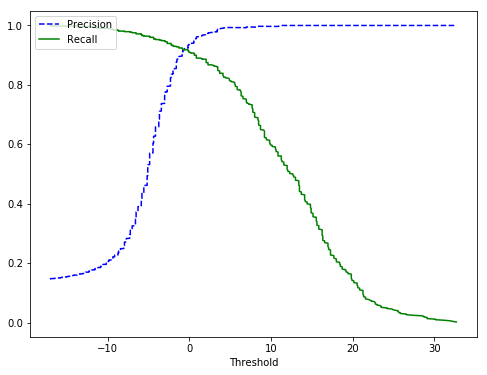

In [331]:
def plot_precision_vs_recall(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label = 'Precision')
    plt.plot(thresholds, recalls[:-1], "g-", label = 'Recall')
    plt.xlabel('Threshold')
    plt.legend(loc = 'upper left')

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls, thresholds)

Since, recall drops drastically, above the threshold of 0, we can only increase precision by a small amount (so that our model doesn't start classifying so many messages as ham).

Let's keep the threshold at 3. This would slightly improve precision while not letting the recall fall too low.

In [332]:
y_train_pred_threshold_3 = (y_scores > 3)

In [333]:
precision_score(y_train_spam,y_train_pred_threshold_3)

0.978494623655914

In [334]:
recall_score(y_train_spam,y_train_pred_threshold_3)

0.8617424242424242

## ROC Curve

The Receiver Operating Characteristic (ROC) curve is commonly used woth binary clasifiers. It plots true positive rate against the false positive rate

In [335]:
from sklearn.metrics import roc_curve

In [336]:
fpr, tpr, thresholds = roc_curve(y_train_spam, y_scores)

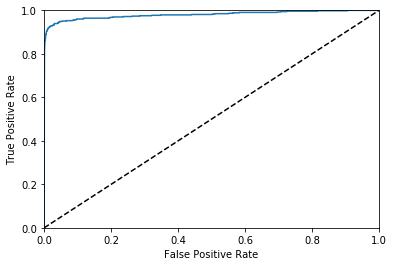

In [337]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.axis([0,1,0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Once again, there is a tradeoff.

The higher the recall (TPR), the more false positives (FPR) the classifier produces

In [338]:
from sklearn.metrics import roc_auc_score

In [339]:
roc_auc_score(y_train_spam, y_scores)

0.98008330637334184

One way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.


References:
    
1) https://www.kaggle.com/futurist/text-preprocessing-and-machine-learning-modeling

2) Hands-On Machine Learning with Scikit-Learn and TensorFlow - Aurélien Géron  

# Thank You!